In [1]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

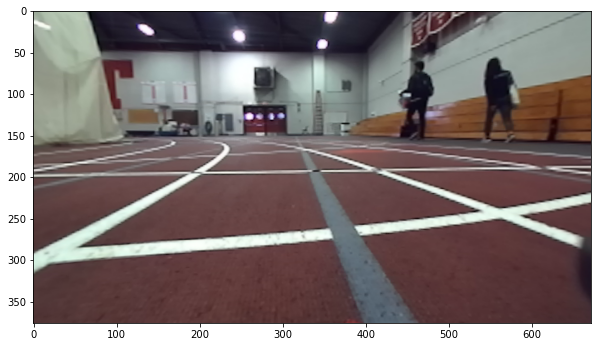

In [53]:
test_image_path="../media/TrackPics/4_whitelines.png"
image = cv2.imread(test_image_path)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [54]:
print(image.shape)

(376, 672, 3)


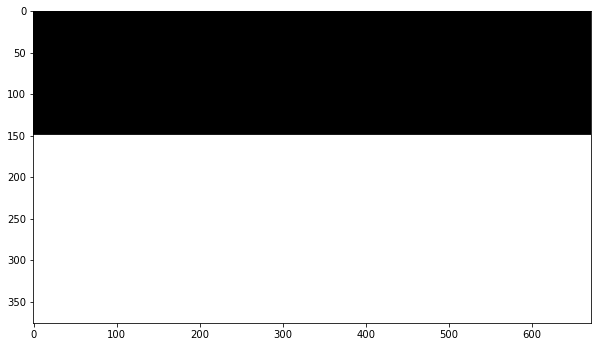

In [55]:
# create a zero array
stencil = np.zeros_like(image[:,:,0])
# specify coordinates of the polygon
#polygon = np.array([[-150,376], [280,160], [400,160], [1100,376]])
polygon = np.array([[0,376], [0,150], [672,150], [672,376]])
# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

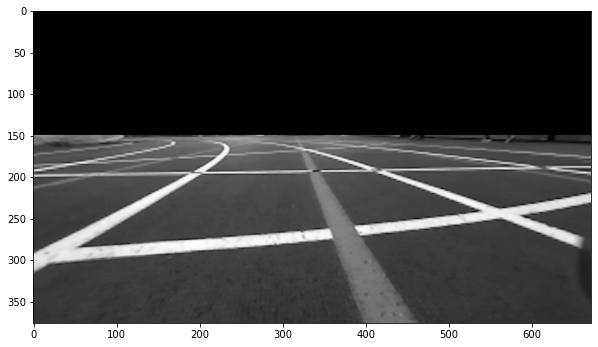

In [56]:
# apply polygon as a mask on the frame
img = cv2.bitwise_and(image[:,:,0], image[:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

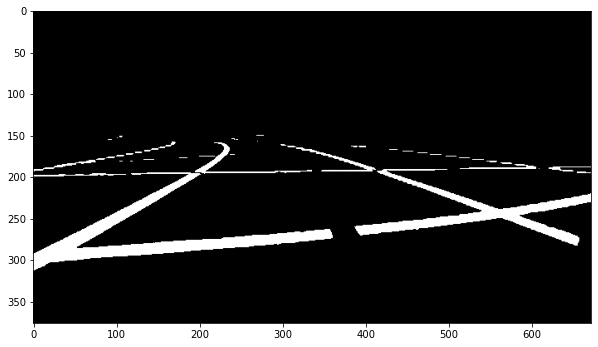

In [57]:
# apply image thresholding
ret, thresh = cv2.threshold(img, 165, 200, cv2.THRESH_BINARY)

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

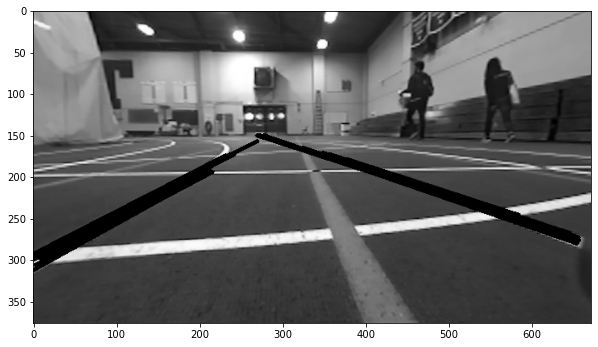

In [60]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 60, maxLineGap=200)
lines_filtered = []
# create a copy of the original frame
dmy = image[:,:,0].copy()

# draw Hough lines
for line in lines:
  x1, y1, x2, y2 = line[0]
  
  m = (y2-y1)/(x2-x1)
  if (abs(m) > 0.3):
      lines_filtered.append(line)
      cv2.line(dmy, (x1, y1), (x2, y2), (0, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(dmy, cv2.COLOR_BGR2RGB))
plt.show()

(276, 225)


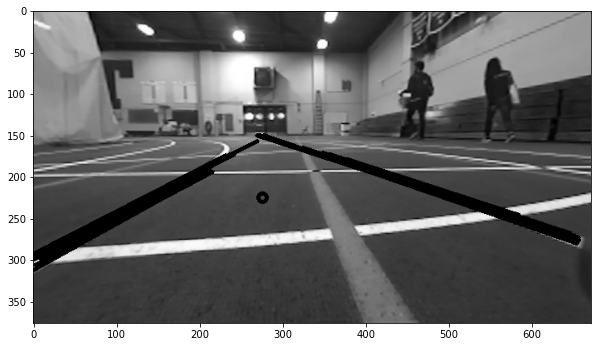

In [61]:
y_lookahead = 225
sumx = 0;

for line in lines_filtered:
  x1, y1, x2, y2 = line[0]
  
  m = (y2-y1)/(x2-x1)
  b = y2-(m*x2)
    
  x_lookahead = (y_lookahead-b)/m
  sumx += x_lookahead

avgx = sumx/(len(lines_filtered))

cv2.circle(dmy, (int(avgx), int(y_lookahead)), 5, (0, 0, 0), 3)
print((int(avgx), int(y_lookahead)))
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(dmy, cv2.COLOR_BGR2RGB))
plt.show()